In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
COLAB = True
print("Note: using Google CoLab")
%tensorflow_version 2.x

Mounted at /content/drive
Note: using Google CoLab


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
image_data = "/content/drive/My Drive/DMW/pickled_data.txt"
data = "/content/drive/My Drive/DMW/Preprocessing/normal/normal_csv/"

In [4]:
normal_y = pd.read_csv(data + 'normal_right.csv').iloc[:,3]
normal_n = pd.read_csv(data + 'not_normal_right.csv').iloc[:,3]
len(normal_y), len(normal_n)

(1525, 1975)

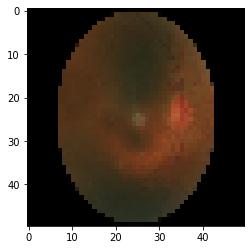

In [5]:
x = []
y = []
size_l = 50
size_b = 50

myfile = open(image_data, mode='rb')
temp = pickle.load(myfile)
myfile.close()

# count = 0
for image_name in normal_y:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x.append(image)
    y.append(1)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break

for image_name in normal_n:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x.append(image)
    y.append(0)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break
temp.clear()
plt.imshow(cv2.cvtColor(x[0], cv2.COLOR_BGR2RGB))

In [6]:
x_np = np.asarray(x)
y_np = np.asarray(y)

((3500, 50, 50, 3), (3500,))

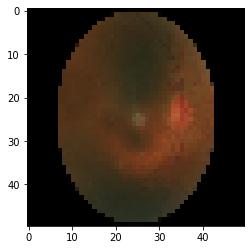

In [7]:
# x_np = x_np.reshape((x_np.shape[0], x_np.shape[2], x_np.shape[1], x_np.shape[3]))
plt.imshow(cv2.cvtColor(x[0], cv2.COLOR_BGR2RGB))
x_np.shape, y_np.shape

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((3150, 50, 50, 3), (350, 50, 50, 3))

In [13]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size_l, size_b, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(34, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 34)        4930      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 34)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4114)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [15]:
epochs = 100
batch_size = 20
history = model.fit(x_np, y_np, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))

Epoch 1/100
175/175 [==============================] - 7s 38ms/step - loss: 0.5184 - accuracy: 0.7466 - val_loss: 0.4685 - val_accuracy: 0.7543
Epoch 2/100
175/175 [==============================] - 6s 36ms/step - loss: 0.4664 - accuracy: 0.7743 - val_loss: 0.3983 - val_accuracy: 0.8086
Epoch 3/100
175/175 [==============================] - 9s 50ms/step - loss: 0.4122 - accuracy: 0.7994 - val_loss: 0.3338 - val_accuracy: 0.8571
Epoch 4/100
175/175 [==============================] - 6s 37ms/step - loss: 0.4230 - accuracy: 0.7900 - val_loss: 0.3352 - val_accuracy: 0.8571
Epoch 5/100
175/175 [==============================] - 6s 37ms/step - loss: 0.3949 - accuracy: 0.8134 - val_loss: 0.3337 - val_accuracy: 0.8514
Epoch 6/100
175/175 [==============================] - 7s 37ms/step - loss: 0.3696 - accuracy: 0.8257 - val_loss: 0.3110 - val_accuracy: 0.8571
Epoch 7/100
175/175 [==============================] - 7s 37ms/step - loss: 0.3524 - accuracy: 0.8414 - val_loss: 0.2755 - val_accuracy:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(25, 8))
plt.subplot(3, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(3, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
X_test.shape, y_test.shape

22/22 [==============================] - 3s 120ms/step - loss: 0.2174 - accuracy: 0.9157
accuracy: 91.57%


((700, 50, 50, 3), (700,))

In [ ]:
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open("/content/drive/My Drive/DMW/Preprocessing/normal/Model/Left_normal.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/DMW/Preprocessing/normal/Model/Left_normal.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/DMW/Preprocessing/normal/Model/Left_normal.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/DMW/Preprocessing/normal/Model/Left_normal.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
22/22 [==============================] - 2s 110ms/step - loss: 0.2174 - accuracy: 0.9157
accuracy: 91.57%
